In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# import rasterio
import os
import glob

The main idea is to use the avaialbale labled dataset to build a neural network model that can classify images to their respective classes.
Based on the current end goal, the most important class for now is "Crater", anf the model will be optimized to best detect craters.
I want to study the craters, and how their characteritics can be used to detect river basins on Mars.
This model (after optimizition) should be able to detect craters in unlabled images and classify them correctly. 
In the fist part all the images in the dataset will be loaded and saved in one numpy array, in order to not read them all as individual files every time. 

In [2]:
# directory = '/Users/kimia/Desktop/python-planetary/map3'

# # Get a list of all the image file s in the directory
# image_files = [f for f in os.listdir(directory) if f.endswith('.jpg')]

In [3]:
# # Initialize an empty list to store the images
# images = []

# # Loop through the files in the directory
# for file in glob.glob(directory + '/*.jpg'):
#     # Open the file with rasterio
#     with rasterio.open(file) as src:
#         # Read the image and convert it to a NumPy array
#         img_array = src.read()
#         # Add the image to the list
#         images.append(img_array)

# # Convert the list of images to a NumPy array
# images = np.array(images)

In [4]:
# np.save('all_images_array.npy', images)

In [5]:
imgs=np.load("all_images_array.npy")
imgsf = np.squeeze(imgs)
name=np.array(pd.read_excel("namesc.xlsx"))
code=name[:,1]
code.shape

(73031,)

In [6]:
print ( " Shape of the image dataset is", imgsf.shape, ", and  shape of the code file is ", code.shape)

 Shape of the image dataset is (73031, 227, 227) , and  shape of the code file is  (73031,)


In [7]:
np.unique(code, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=object),
 array([61054,  4900,  1141,  2331,  1750,   231,  1148,   476]))

In [8]:
##pommiting the "other" class with code 0 
img=[]
codeimg1=[]
codeimg=[]
for i in range (0, len(code)):
    if code[i]!=0 :
        img1=imgsf[i,:,:]
        img.append(img1)
        code1=code[i]-1
        code2=code[i]
        codeimg1.append(code1)
        codeimg.append(code2)
        
img=np.array(img)
codeimg1=np.array(codeimg1)
codeimg=np.array(codeimg)

In [9]:
names=np.array(pd.read_excel("name.xlsx"))
names

array([[0, 'crater'],
       [1, 'dark dune'],
       [2, 'slope streak'],
       [3, 'bright dune'],
       [4, 'impact ejecta'],
       [5, 'swiss cheese'],
       [6, 'spider']], dtype=object)

In [10]:
# codeimg1=[]
# codeimg=[]
# for i in range(0, len(code)):
#     if code[i] !=0:
#         code1=code[i]-1
#         code2=code[i]
#         codeimg1.append(code1)
#         codeimg.append(code2)
       
        
# codeimg1=np.array(codeimg1)
# codeimg=np.array(codeimg)

In [11]:
# codeimg=[]
# for i in range(0, len(code)):
#     if code[i] !=0:
#         code2=code[i]
#         codeimg.append(code2)
        
# codeimg=np.array(codeimg)

In [12]:
np.unique(codeimg1, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([4900, 1141, 2331, 1750,  231, 1148,  476]))

In [13]:
np.unique(codeimg, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7]),
 array([4900, 1141, 2331, 1750,  231, 1148,  476]))

8054


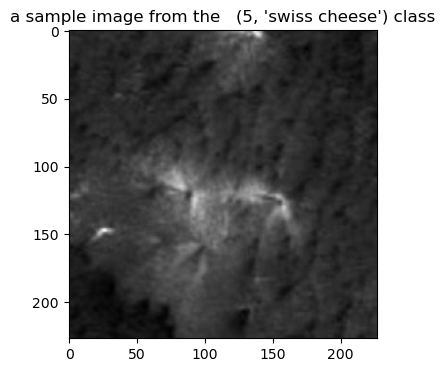

In [14]:
#showing a random image and it's code
a=np.random.randint(0,len(img))
sample=img[a,:,:]
plt.figure(figsize=(4,4))
plt.imshow(sample, cmap="gray")
plt.title(f'a sample image from the   {codeimg1[a], names[codeimg1[a], 1]} class')
print(a)

In [15]:
# crater=img

In [16]:
import sklearn
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

2023-01-09 12:44:28.517150: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
from sklearn import model_selection
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(img,codeimg1,test_size=0.3, random_state=43 )

In [18]:
# Normalize the data
X_train = (X_train / 255.0)
# X_train =X_train.astype('float32')
# y_train=y_train.astype('float32')
X_test = (X_test / 255.0)
# X_test=X_test.astype('float32')
# y_test=y_test.astype('float32')

In [19]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([3414,  807, 1605, 1256,  169,  809,  323]))

In [20]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6])

In [21]:
# Convert the labels to categorical format
y_train1 = to_categorical(y_train, num_classes=7)
y_test1 = to_categorical(y_test, num_classes=7)

In [22]:
y_train1.shape

(8383, 7)

The Conv2D layer is a convolutional layer, which is commonly used in image classification and object detection tasks. The Conv2D layer applies a set of 2D convolutional filters to the input data, which can be used to extract features from the input images.

The Conv2D layer takes as input a 4D tensor with the following dimensions:
The batch size (the number of images in the input batch)
The height of the images
The width of the images
The number of channels in the images (e.g. 1 for grayscale, 3 for RGB)
The Conv2D layer applies a set of 2D convolutional filters to the input data, where each filter is of size (filter_height, filter_width). In this case, the kernel_size parameter specifies that the filters have a size of (3, 3). It also has a parameter called filters, which specifies the number of filters to be used in the layer. In this case, the filters parameter is set to 20, which means that the layer will apply 20 different filters to the input data.

The activation parameter specifies the activation function to be used by the neurons in the layer. In this case, the 'relu' activation function is used, which stands for "rectified linear activation." The relu function applies the function max(0, x) element-wise to the input, which has the effect of thresholding negative values to 0.

The Flatten layer is a utility layer that flattens the input data into a 1D array. The Flatten layer is commonly used after the convolutional layers of a neural network to reshape the output of the convolutional layers into a format that can be processed by the fully-connected layers of the network. It does not have any trainable parameters and simply performs a reshaping operation on the input data.

The MaxPooling2D layer is a pooling layer, which is commonly used in image classification and object detection tasks. The MaxPooling2D layer applies a max pooling operation to the input data, which can be used to reduce the spatial dimensions of the input and extract the most important features from the input images.

The Dense layer is a fully-connected layer, which means that all of the neurons in the layer are connected to all of the neurons in the previous layer. The Dense layer takes as input an array of values and applies a linear transformation to the input using a set of weights and biases. It can be used to learn complex relationships between the input and the output of the neural network. The number of neurons in the layer (128 in this case) determines the capacity of the layer to learn these relationships.
the Dropout layer is a regularization technique that helps to prevent overfitting by randomly dropping out a certain percentage of the neurons in the layer during training. The Dropout layer has a parameter called rate, which specifies the fraction of neurons to drop out. For example, a Dropout layer with rate=0.5 will drop out 50% of the neurons in the layer. It is usually used after the fully-connected layers of a neural network, as it can help to reduce the dependence of the model on any particular feature, which can improve the generalization performance of the model.




In [23]:
model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu', input_shape=(227, 227, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

2023-01-09 12:44:35.605471: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 20)      200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 20)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      11584     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 193600)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [25]:
# Train the model
history=model.fit(X_train, y_train1, batch_size=32, epochs=30, validation_data=(X_test, y_test1))

Epoch 1/30
262/262 [==============================] - 166s 620ms/step - loss: 1.8065 - accuracy: 0.3950 - val_loss: 1.6629 - val_accuracy: 0.4135
Epoch 2/30
262/262 [==============================] - 161s 609ms/step - loss: 1.6621 - accuracy: 0.4074 - val_loss: 1.6196 - val_accuracy: 0.4135
Epoch 3/30
262/262 [==============================] - 160s 610ms/step - loss: 1.6426 - accuracy: 0.4074 - val_loss: 1.6180 - val_accuracy: 0.4135
Epoch 4/30
262/262 [==============================] - 432s 2s/step - loss: 1.6323 - accuracy: 0.4074 - val_loss: 1.6284 - val_accuracy: 0.4121
Epoch 5/30
262/262 [==============================] - 534s 2s/step - loss: 1.6074 - accuracy: 0.4083 - val_loss: 1.6279 - val_accuracy: 0.4060
Epoch 6/30
262/262 [==============================] - 373s 1s/step - loss: 1.5771 - accuracy: 0.4129 - val_loss: 1.6626 - val_accuracy: 0.4026
Epoch 7/30
262/262 [==============================] - 159s 608ms/step - loss: 1.5229 - accuracy: 0.4265 - val_loss: 1.6887 - val_accu

In [26]:
# history.history['accuracy']

In [27]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
    """Plots the loss and accuracy over the training iterations.
    
    Args:
        history: A history object returned by the fit function of a Keras model.
    """
    # Extract the loss and accuracy values from the history object
    loss = history.history['loss']
    acc = history.history['accuracy']
    
    # Plot the loss values
    plt.plot(loss)
    plt.title('Loss over training iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()
    
    # Plot the accuracy values
    plt.plot(acc)
    plt.title('Accuracy over training iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.show()

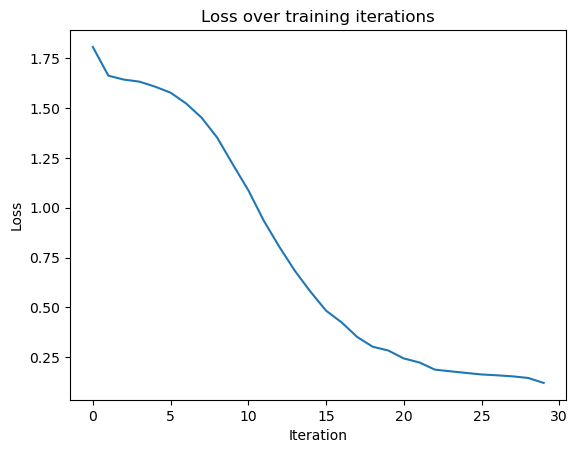

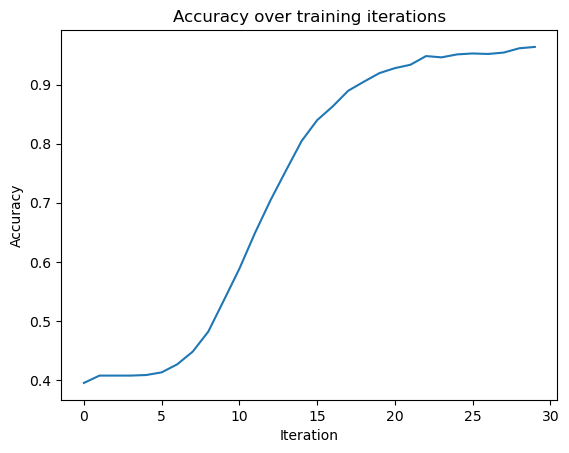

In [28]:
plot_loss_accuracy(history)

In [29]:
 y_pred = model.predict(X_test)

113/113 [==============================] - 12s 105ms/step


In [30]:
y_pred.shape

(3594, 7)

In [31]:
y_test1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
y_test2 = np.argmax(y_test1, axis=1)
y_pred2 = np.argmax(y_pred, axis=1)

In [33]:
np.unique(y_test2, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([1486,  334,  726,  494,   62,  339,  153]))

In [34]:

np.unique(y_pred2, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([1913,  202,  929,  387,    6,  138,   19]))

In [35]:
np.unique(code, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=object),
 array([61054,  4900,  1141,  2331,  1750,   231,  1148,   476]))

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# plt.xlabel('Predicted class')
# plt.ylabel('True class')

# class_names= names[:,1].T

# # Set the tick labels of the confusion matrix
# plt.xticks(range(len(class_names)), class_names)
# plt.yticks(range(len(class_names)), class_names)



cm = confusion_matrix(y_test2, y_pred2)

# Print the confusion matrix
print(cm)
# Plot the confusion matrix
# plt.imshow(cm, cmap='Blues')

[[759  84 405 169   3  57   9]
 [173  18  89  41   0  11   2]
 [402  38 177  67   1  36   5]
 [279  28 122  50   0  13   2]
 [ 31   4  18   8   0   1   0]
 [178  25  86  34   1  15   0]
 [ 91   5  32  18   1   5   1]]
